## Summary
This notebook is an exploratory data analysis of a data set on Kaggle, that explores research on heart disease.

https://www.kaggle.com/ronitf/heart-disease-uci

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

First, we'll import the data using the pandas read_csv function:

In [2]:
heart_data = pd.read_csv('heart.csv')

By looking at the first 5 rows of our data, we can see a snapshot of the features and label for each of those 5 rows:

In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The shape function shows us that our array has 303 rows with 14 columns of data:

In [4]:
heart_data.shape

(303, 14)

The info() function will reveal the count of present data in each column, as well as the data type:

In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


By calling describe() we can see some basic pieces of information about our data including count (and whether or not any data is missing -- it's not!), mean, standard deviation, and more.

In [6]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Some initial takeaways from our describe() function:
- the mean of the age is around 54 years old, which seems plausible. The std shows that there is a pretty wide range of ages spread out from the mean.
- the mean of sex shows that the data is slightly skewed more male than female, which also seems likely since anecdotally it seems more men have heart issues than women.
- the column "cp" refers to chest pain type and contains categorical data (0-3):
    - 0 = asymptomatic
    - 1 = atypical angina
    - 2 = non-anginal pain
    - 3 = typical angina
- the column "chol" refers to serum cholesterol and shows a very large standard deviation, which means there's a large range of values on either side of the mean. A quick google search reveals that under 200 is a healthy range for serum cholesterol -- the mean is slightly above this -- this makes sense to me. But I see the max value is quite a bit higher -- perhaps an outlier we'll need to deal with?
- the column "fbs" is boolean, and refers to whether the fasting blood sugar was greater than 120mg/dl. 0 means False and 1 means True. Far more subjects had blood sugar below the benchmark.
- the column "thalach" refers to the maximum heart rate achieved. At first glance, these look like plausible heart rates, although the max is quite high.
- the column "exang" refers to exercise-induced angina. The boolean data corresponds to 1=yes, 0=no.
- the column "ca" refers to the "number of major vessels (0-3) colored by flourosopy." I see in my describe() data that the max value is 4. I'm not sure why, but I'm making a note to remove this/these data point(s).

I'll explore some of these takeaways in more detail below.

# Age

Since the standard deviation of age was quite high, I'd like to see the range of ages, and the counts of how frequently each age appeared in our data. I want them sorted from youngest to oldest, so I'll add the sort_index() function:

In [8]:
heart_data['age'].value_counts().sort_index()

29     1
34     2
35     4
37     2
38     3
39     4
40     3
41    10
42     8
43     8
44    11
45     8
46     7
47     5
48     7
49     5
50     7
51    12
52    13
53     8
54    16
55     8
56    11
57    17
58    19
59    14
60    11
61     8
62    11
63     9
64    10
65     8
66     7
67     9
68     4
69     3
70     4
71     3
74     1
76     1
77     1
Name: age, dtype: int64

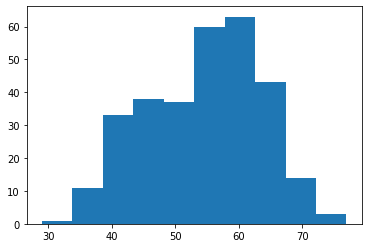

In [29]:
# Visualized
plt.hist(heart_data['age'])
plt.show()

In [55]:
heart_data['age'].mode()

0    58
dtype: int64

And how did the subject's age relate to the target?

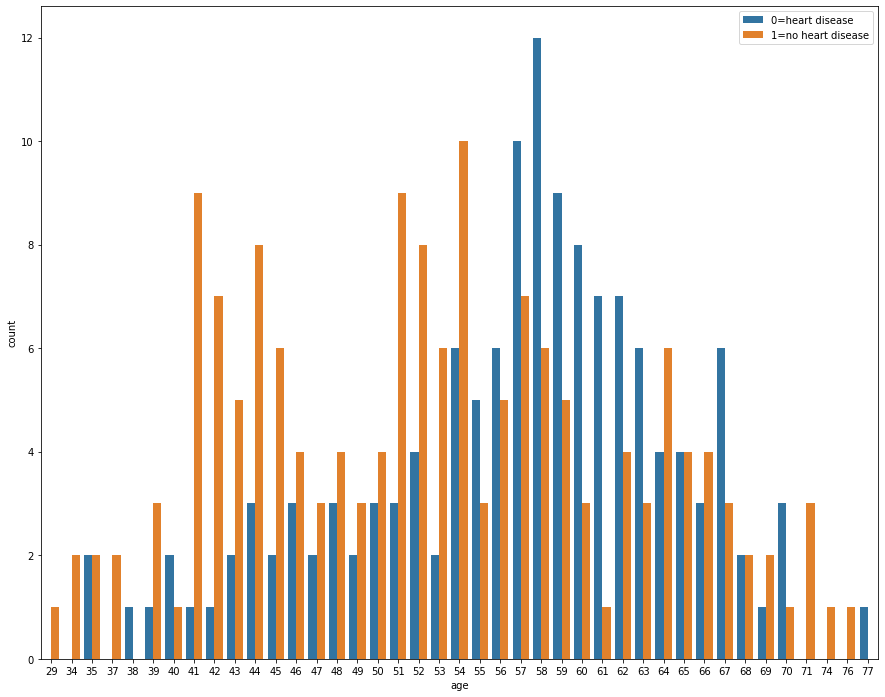

In [104]:
fig_dims = (15, 12)
fig = plt.subplots(figsize=fig_dims)
sns.countplot(x='age', hue='target', data=heart_data)
plt.legend(labels=('0=heart disease', '1=no heart disease'), loc=1)
plt.show()

Paired with the value counts we looked at earlier, we'll spot check this visualization and see that:
- the 1 subject who was 29 years old did not have heart disease
- of the 19 subjects who were 58 years old (the mode age), more subjects had heart disease than not (but it wasn't particularly overwhelming)
- the 1 subject who was 77 years old did have heart disease

And if we look at the above visualization in a broader sense, we see that the left side of the graph is more orange and the right side is more blue. Clearly, age is a risk factor for heart disease.

## Sex

Let's look at whether heart disease affected males or females more. We'll do a value count of sex against target.

As a reminder:

Sex:
- 0=female
- 1=male

Target:
- 0=heart disease
- 1=no heart disease

In [82]:
heart_data.groupby(['target']).agg({i:'value_counts' for i in heart_data.columns[1:2]})

sex
target sex     
0      1    114
       0     24
1      1     93
       0     72

This tells us:
- there were 114 men with heart disease
- there were 24 women with heart disease
- there were 93 men without heart disease
- there were 72 women without heart disease

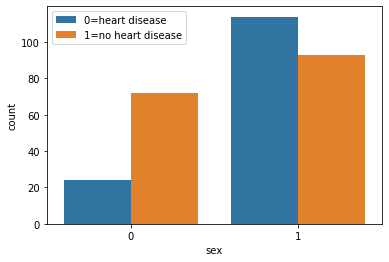

In [65]:
# Visualized:
sns.countplot(x='sex', hue='target', data=heart_data)
plt.legend(labels=('0=heart disease', '1=no heart disease'))
plt.show()

## Chest Pain Type

The mean of the chest pain type feature was just under 1, but I'm more interested in the mode, so we'll look at value_counts of this feature. Category 0 occurs most frequently, followed by category 2.
For reference:
- 0 = asymptomatic
- 1 = atypical angina
- 2 = non-anginal pain
- 3 = typical angina

In [10]:
heart_data['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

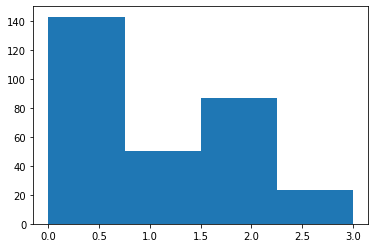

In [36]:
# Visualized:
plt.hist(heart_data['cp'], bins=4)
plt.show()

I'm curious how many of the asymptomatic subjects (category 0) vs. symptomatic subjects (categories 1, 2, 3) had heart disease.

In [229]:
asymptomatic = len(heart_data[(heart_data['cp'] == 0) & (heart_data['target'] == 0)])
print(str(asymptomatic) + " of the subjects were asymptomatic and had heart disease.")

symptomatic = len(heart_data[((heart_data['cp'] == 1) 
                          | (heart_data['cp'] == 2)
                          | (heart_data['cp'] == 3))
                          & (heart_data['target'] == 0)])
print(str(symptomatic) + " of the subjects were symptomatic and had heart disease.")                          

103 of the subjects were asymptomatic and had heart disease.
34 of the subjects were symptomatic and had heart disease.


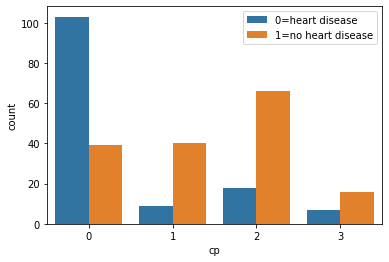

In [111]:
# Visualized
sns.countplot(x='cp', hue='target', data=heart_data)
plt.legend(labels=('0=heart disease', '1=no heart disease'))
plt.show()

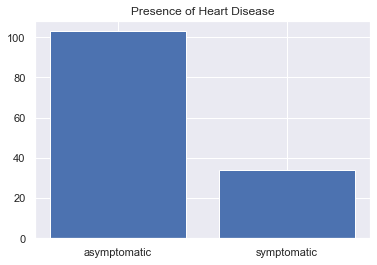

In [231]:
bars = ('asymptomatic', 'symptomatic')
height = (103, 34)
plt.title("Presence of Heart Disease")

plt.bar(bars, height)
plt.show()

Wow, this is unexpected! This shows that a large amount (103) of asymptomatic subjects had heart disease, meanwhile only 34 symptomatic patients had heart disease!

## Serum Cholesterol

Since the standard deviation and the max value of the chol column were so high, I'd like to look at a basic histogram, which will show the distribution frequencies:

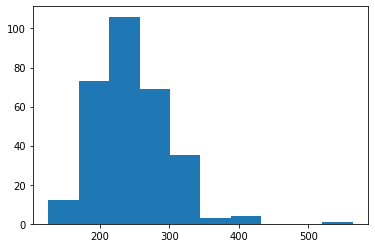

In [12]:
plt.hist(heart_data['chol'])
plt.show()

I'm concered about the long tail at the right. Our earlier exploration showed that the max value was 564, which is likely an error. Let's find and remove this data point.

In [177]:
heart_data.loc[heart_data['chol'] == 564]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


In [178]:
heart_data = heart_data.drop([85], axis=0)

Let's make sure we were successful:

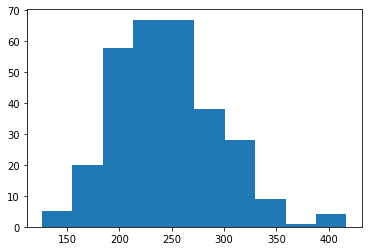

In [180]:
plt.hist(heart_data['chol'])
plt.show()

## Maximum Heart Rate and Exercise-Induced Angina

I'm curious about the relationship between the maximum heart rate achieved during stress test ("thalach") and whether or not the subject had exercise-induced angina ("exang"; 1=yes, 0=no). My gut thinks that people who were able to safely achieve a very high heart rate probably would not experience chest pain during exercise thus there's probably not much correlation.

In [16]:
heart_data['thalach'].corr(heart_data['exang'])

-0.37881209385148673

In [27]:
heart_data[['thalach', 'exang']].sort_values(['thalach', 'exang'], ascending=False).head(10)

,thalach,exang
72,202,0
248,195,0
103,194,0
125,192,0
62,190,0
32,188,0
1,187,0
73,186,1
56,186,0
57,185,0


My theory looks pretty good! There is not much correlation between the 2 features, and looking at the data chart, we see that only 1 of the 10 subjects with the highest heart rates had exercise-induced angina.

I'm going to add the target column to this chart and see if I can glean any additional insight.

In [28]:
heart_data[['thalach', 'exang', 'target']].sort_values(['thalach', 'exang', 'target'], ascending=False).head(10)

,thalach,exang,target
72,202,0,1
248,195,0,0
103,194,0,1
125,192,0,1
62,190,0,1
32,188,0,1
1,187,0,1
73,186,1,1
56,186,0,1
57,185,0,1


Interesting. We see that 9 of the 10 subjects with the highest heart rates also did NOT have heart disease (1=no, 0=yes).

What about the reverse? Do subjects with low heart rates during a stress test likely have heart disease? 

In [186]:
heart_data[['thalach', 'target']].sort_values(['thalach', 'target'], ascending=True).head(10)

,thalach,target
272,71,0
243,88,0
297,90,0
262,95,0
233,96,0
136,96,1
216,97,0
198,99,0
226,103,0
269,103,0


Overwhelmingly, yes! We see that 9 of the 10 subjects with the lowest heart rates during the stress test DO have heart disease!

Let's visualize this hypothesis using the full data set:

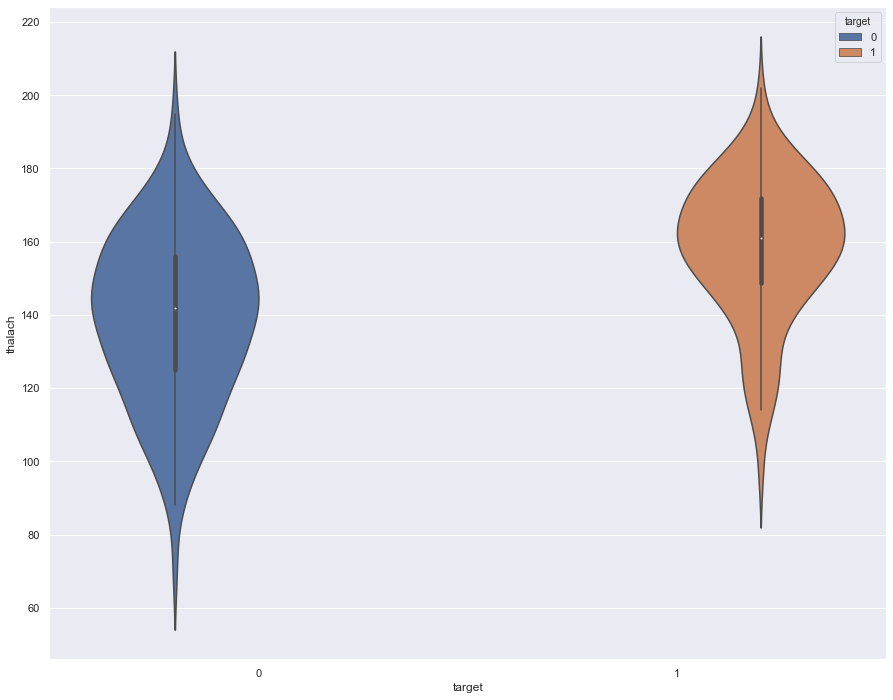

In [223]:
# Visualized 

fig_dims = (15, 12)
fig = plt.subplots(figsize=fig_dims)
sns.violinplot(x='target', y='thalach', hue='target', data=heart_data)
plt.show()

When we look at this theory using the full dataset, the findings aren't quite so dramatic. But you can see the trend that subjects with lower heart rates have heart disease, and subjects with higher heart rates do not.

## Major vessels colored by flourosopy

As noted upstream, this categorical feature takes on values 0-3, however we've seen that there is at least one instance of a value of 4. Let's look into this further.

In [83]:
heart_data['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

Aha! There are 5 instances of this issue -- it makes me question the validity of the rest of the feature data for these data points. I'm going to find these rows and then remove them.

In [84]:
heart_data.loc[heart_data['ca'] == 4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [87]:
heart_data = heart_data.drop([92, 158, 163, 164, 251], axis=0)

Let's make sure we were successful:

In [88]:
heart_data['ca'].value_counts()

0    175
1     65
2     38
3     20
Name: ca, dtype: int64